# 01 – Data Exploration and Cleaning
### Car Price Prediction Using Machine Learning
Group Assignment 02 - CCS3012 - Data Analytics  
Submission Date: 16th September 2025

---

### **Group 11**
-  **FC211034 - N.D. Samararathne Kodikara**
-  **FC211013 - N.W.V. Tharindu Pabasara**
-  **FC211025 - W.M.M.C.B. Wijesundara**



---

### **Supervisor**
**Ms. Dilmi Praveena**  
*Faculty of Computing*  
*University of Sri Jayewardenepura*

---



## 📌 Objective
This notebook focuses on understanding the dataset, cleaning it, and preparing it for further analysis and modeling.

**Key Tasks:**
- Load dataset
- Inspect and document schema / anomalies
- Clean & convert data types
- Basic descriptive analysis & visualizations
- Save a cleaned dataset for next notebooks


---

### 📂 Input  
 - `car_price_prediction.csv` saved in `Data/raw/`  


### 📦 Output  
- `clean_data.csv` saved in `Data/processed/`

---

### 📊 Dataset Overview
**Dataset:** Car price dataset.  
**columns include**: ID, Price, Levy, Manufacturer, Model, Prod. year, Category, Leather interior, Fuel type, Engine volume, Mileage, Cylinders, Gear box type, Drive wheels, Doors, Wheel, Color, Airbags.


| **Attribute** | **Details** |
|---------------|-------------|
| **Dataset Size** | 19,237 records × 18 features |
| **Data Type** | Structured tabular data (CSV format) |
| **Target Variable** | `Price` (in USD $) |
| **Problem Type** | Regression |
| **Data Source** | [Car Price Prediction Dataset](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge) |

## Setup & imports

In [2]:
#First we have to Import necessary libraries for data manipulation and visualization.

# Data Manipulation and Utilities
import pandas as pd     # For data manipulation and analysis.
import numpy as np      # For numerical operations.
import re               # For regular expressions.
import warnings         # For managing warnings.

# Data Visualization
import matplotlib.pyplot as plt     # For basic data visualization.
import seaborn as sns               # For statistical data visualization.

from prettytable import PrettyTable # For creating formatted tables in the console.

In [3]:
# Reusable function definitions

# Function to Print Shape of DataFrame
def get_data_shape(data: pd.DataFrame) -> None:
    if data.empty:
        print("DataFrame is empty.")
    else:
        # Print the shape of the DataFrame
        print("DataFrame Dimensions")
        print("------------------------")
        print(f"Rows   : {data.shape[0]}")
        print(f"Columns: {data.shape[1]}\n")

# A function to format value counts into a table. For more elegant and readable notebook.
def value_counts_pretty(series, column_name="Value", n=None, head=True):
    value_counts = series.value_counts(dropna=False)
    percentages = series.value_counts(dropna=False, normalize=True) * 100
    
    # Apply head/tail filtering if n is specified
    if n is not None:
        if head:
            value_counts = value_counts.head(n)
            percentages = percentages.head(n)
        else:
            value_counts = value_counts.tail(n)
            percentages = percentages.tail(n)
    
    table = PrettyTable()        
    table.field_names = [column_name, "Count", "Percentage"]
    
    # Set alignment
    table.align[column_name] = "c"
    table.align["Count"] = "r"
    table.align["Percentage"] = "r"
    
    # Add rows
    for rank, (value, count) in enumerate(value_counts.items(), 1):
        display_value = "NaN/Missing" if pd.isna(value) else str(value)
        pct = percentages[value]
        
        table.add_row([display_value, count, f"{pct:.2f}%"])
    
    return table

In [4]:
# Next we load the dataset.
raw_df = pd.read_csv("./Data/raw/car_price_prediction.csv")


In [5]:
# Prints the first 5 rows of the DataFrame (Provides a quick look at the dataset's content).
raw_df.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


💡 **Observations:**  
- All the column names appear to be readable and meaningful but has spaces between words need Standardising.
- At first glance, the `Doors` column shows inconsistencies such as entries like "04-May," indicating data quality issues. 
- The `Levy` column also contains missing values marked by dashes (-). 
- The `Mileage` column includes values with units like "km," which will need to be cleaned.
- Overall, the dataset features a mix of numerical and categorical variables that will require cleaning before analysis.



In [6]:
# Clean column names
# Remove leading/trailing spaces, convert to lowercase, replace spaces and question marks
# 🟢 Return a new dataframe
df = raw_df.copy()      
df.columns = [col.strip().lower().replace(" ", "_").replace("/", "_").replace(".", "").replace("-", "_").replace("?", "").rstrip("_") for col in raw_df.columns]
print("\n► Column names:")
print(df.columns.tolist())


► Column names:
['id', 'price', 'levy', 'manufacturer', 'model', 'prod_year', 'category', 'leather_interior', 'fuel_type', 'engine_volume', 'mileage', 'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color', 'airbags']


In [7]:
# Find the dimensions of the dataset
get_data_shape(df)

DataFrame Dimensions
------------------------
Rows   : 19237
Columns: 18



📝 The dataset contains 19,237 rows and 18 columns.

In [8]:
# Prints the name of each column in the dataset, the number of non-null values it contains, and its data type.
def df_info(df):
    table = PrettyTable()
    table.field_names = ["Column", "Non-Null Count", "Dtype"]

    for col in df.columns:
        non_null_count = df[col].count()
        dtype = df[col].dtype
        table.add_row([col, non_null_count, dtype])

    print(table)

df_info(df)

+------------------+----------------+---------+
|      Column      | Non-Null Count |  Dtype  |
+------------------+----------------+---------+
|        id        |     19237      |  int64  |
|      price       |     19237      |  int64  |
|       levy       |     19237      |  object |
|   manufacturer   |     19237      |  object |
|      model       |     19237      |  object |
|    prod_year     |     19237      |  int64  |
|     category     |     19237      |  object |
| leather_interior |     19237      |  object |
|    fuel_type     |     19237      |  object |
|  engine_volume   |     19237      |  object |
|     mileage      |     19237      |  object |
|    cylinders     |     19237      | float64 |
|  gear_box_type   |     19237      |  object |
|   drive_wheels   |     19237      |  object |
|      doors       |     19237      |  object |
|      wheel       |     19237      |  object |
|      color       |     19237      |  object |
|     airbags      |     19237      |  i

💡 **Observations:**  
- All columns have 19,237 non-null values indicating no missing values. However, earlier checks revealed some missing or placeholder values that require further investigation and cleaning.
- Several columns expected to be numeric (like Levy, Mileage, and Engine volume) are currently of type object, which means they may contain non-numeric characters or inconsistent formatting.

In [9]:
# Prints basic statistics (mean, standard deviation, min, max, etc.)
df.describe(include=[np.number])      # For  numeric data types


,id,price,prod_year,cylinders,airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


💡 **Observations:**  
- `price` has a minimum value of $1 and a maximum that’s over 50 times the mean. Suggests outliers.
- `prod_year` ranges from 1939 to 2020 — likely contains outliers or vintage cars.
- `cylinders` has a Max value of 16, which could be rare or performance vehicles.  
- Some vehicles seems to have 0 `airbags`, which might indicate: Older models, Missing or misreported values.
- `id` is a unique identifier for each row and does not carry predictive value.


In [10]:
# Let's see how many rows with these extreme values
# Production year:
production_year_40 = df[df['prod_year'] < 1980].shape        # More than 40 yo cars

count_40 = production_year_40[0]
percentage_40 = (count_40 / df.shape[0]) * 100

print(f"► Matches found: {count_40} ({percentage_40:.4f}%)")

► Matches found: 23 (0.1196%)


> 💡 Only 23 rows (~0.11%) have a production year before 1980.  
> *🧠 These likely represent vintage or incorrectly entered data and can be safely removed to prevent skewing the analysis.*

In [11]:
# Save original row count
original_count = df.shape[0]

# Remove cars older than 40 years (prod_year < 1980)
df = df[df['prod_year'] >= 1980].copy()

# Verify removal
count_removed = original_count - df.shape[0]
percentage_removed = (count_removed / original_count) * 100
print(f"► Removed {count_removed} rows ({percentage_removed:.4f}%) with prod_year < 1980")


► Removed 23 rows (0.1196%) with prod_year < 1980


In [12]:
# Cylinders:
cylinderes_16 = df[df['cylinders'] > 12].shape

count_16 = cylinderes_16[0]
percentage_16 = (count_16 / df.shape[0]) * 100

print(f"► Matches found: {count_16} ({percentage_16:.4f}%)")


► Matches found: 6 (0.0312%)


>💡 Only 6 rows match -> these likely represent performance vehicles.  
>*🧠 Since the model focuses on the general car market, they should be removed to avoid skewing the analysis.*

In [13]:
# Save original row count
original_count = df.shape[0]

# Remove cars older than 40 years (cylinders > 12)
df = df[df['cylinders'] <= 12].copy()

# Verify removal
count_removed = original_count - df.shape[0]
percentage_removed = (count_removed / original_count) * 100
print(f"► Removed {count_removed} rows ({percentage_removed:.4f}%) with cylinders > 12")


► Removed 6 rows (0.0312%) with cylinders > 12


In [14]:

# Airbags:
airbags_0 = df[df['airbags'] == 0].shape

count_0 = airbags_0[0]
percentage_0 = (count_0 / df.shape[0]) * 100

print(f"► Matches found: {count_0} ({percentage_0:.4f}%)")

► Matches found: 2390 (12.4427%)


> 💡 2,405  rows (~12.50%) have 0 airbags.  
> *🧠 This is a sizable portion of the data. Further inspection is needed before deciding how to handle them.*

In [15]:
# Prints basic statistics (mean, standard deviation, min, max, etc.)
df.describe(include='object')      # For  numeric data types

,levy,manufacturer,model,category,leather_interior,fuel_type,engine_volume,mileage,gear_box_type,drive_wheels,doors,wheel,color
count,19208,19208,19208,19208,19208,19208,19208,19208,19208,19208,19208,19208,19208
unique,558,64,1580,11,2,7,107,7681,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5793,3768,1083,8727,13943,10126,3912,718,13505,12867,18312,17725,5030


💡 **Observations:**  
- Most columns in the dataset are categorical.  

- The **Levy** column’s top value is '-', likely indicating no levy.

- **Mileage** has a top value of 0. can be new vehicles or placeholders. Need further analyses.

- The **Doors** column contains only 3 unique values but all of them has unusual values like "04-May".  
 > *🧠 suggesting formatting errors that need cleaning.*

- Several key columns show strong class imbalance in their major categories.

- Column **Model** has high cardinality (1051 unique), which may require special encoding techniques.

## Planned Data Transformations

1. **Convert `price` & `levy` to numeric**  
   - Replace '-' or '—' with `0`.

2. **Clean `mileage`**  
   - Remove 'km' and commas, then convert to `int`.

3. **Clean `engine_volume`**  
   - Convert to `float`.

4. **Convert numeric columns**  
   - `cylinders`, `airbags`, `prod_year` → numeric types.

5. **Normalize categorical labels**  
   - Lowercase, trim whitespace, standardize formatting.

6. **Clean `doors`**  
   - Check for mis-parsing, extract numeric values if possible.

7. **Handle duplicates**  



### **1.** **Convert `price` & `levy` to numeric**  

In [16]:
# Let's check how many missing values in levy column
print(f"► Data type of the column: {df['levy'].dtype}\n")
print("► Count of each unique values top 5:")
print(value_counts_pretty(df['levy'], column_name="Levy", n=5))
print("\n")
print("► Count of each unique values bottom 5:")
print(value_counts_pretty(df['levy'], column_name="Levy", n=5, head=False))

► Data type of the column: object

► Count of each unique values top 5:
+------+-------+------------+
| Levy | Count | Percentage |
+------+-------+------------+
|  -   |  5793 |     30.16% |
| 765  |   486 |      2.53% |
| 891  |   461 |      2.40% |
| 639  |   410 |      2.13% |
| 640  |   405 |      2.11% |
+------+-------+------------+


► Count of each unique values bottom 5:
+------+-------+------------+
| Levy | Count | Percentage |
+------+-------+------------+
| 1901 |     1 |      0.01% |
| 1198 |     1 |      0.01% |
| 2223 |     1 |      0.01% |
| 1366 |     1 |      0.01% |
| 3112 |     1 |      0.01% |
+------+-------+------------+


💡 **Observations:**  
- The `levy` column appears to be numerical, but it's currently stored as an `object` type.

- Around 36.15% of the entries are placeholder values ('-'),
 >*🧠 likely indicating vehicles with no levy, so these can be safely replaced with 0.*


In [17]:
# 📌Let's replace the '-' with 0 and assing to a new dataframe.
# 📌And the datatype should be converted to float since Levy represents continuous numeric values.
# 🟢 Return a new dataframe

df_cleaned_1 = df.copy()

df_cleaned_1['levy'] = df['levy'].replace('-', 0)
df_cleaned_1['levy'] = df_cleaned_1['levy'].astype(float)

# Let's verify the changes
print(f"► Data type of the column: {df_cleaned_1['levy'].dtype}\n")
# Check number of null values
print(f"► Number of missing values: {df_cleaned_1['levy'].isnull().sum()}\n")
print("► Summery of Levy column after cleaning:")
df_cleaned_1['levy'].describe()


► Data type of the column: float64

► Number of missing values: 0

► Summery of Levy column after cleaning:


count    19208.000000
mean       633.175239
std        567.152357
min          0.000000
25%          0.000000
50%        642.000000
75%        917.000000
max      11714.000000
Name: levy, dtype: float64

💡 **Observations**  
- The column is now of type `float64`, suitable for numerical analysis.  

### **2.** **Clean `mileage`**  

In [18]:
# check the values
print("► Count of each unique values top 5:")
print(value_counts_pretty(df_cleaned_1['mileage'], column_name="Mileage", n=5))
print("\n") 

print("► Count of each unique values bottom 3:")
print(value_counts_pretty(df_cleaned_1['mileage'], column_name="Mileage", n=3, head=False))
print("\n") 

print("► Summery:")
df_cleaned_1['mileage'].describe()


► Count of each unique values top 5:
+-----------+-------+------------+
|  Mileage  | Count | Percentage |
+-----------+-------+------------+
|    0 km   |   718 |      3.74% |
| 200000 km |   183 |      0.95% |
| 150000 km |   160 |      0.83% |
| 160000 km |   120 |      0.62% |
| 180000 km |   118 |      0.61% |
+-----------+-------+------------+


► Count of each unique values bottom 3:
+-----------+-------+------------+
|  Mileage  | Count | Percentage |
+-----------+-------+------------+
| 114406 km |     1 |      0.01% |
|  91193 km |     1 |      0.01% |
| 101920 km |     1 |      0.01% |
+-----------+-------+------------+


► Summery:


count     19208
unique     7681
top        0 km
freq        718
Name: mileage, dtype: object

💡 **Observations:**

- The `mileage` column is currently of type `object`, though it represents numeric data.

- 721 entries (3.75%) have a value of "0 km", which could indicate brand new cars or be placeholders for missing data.
- Many top values appear **rounded**, such as 200,000 km or 150,000 km, but there are also many unique precise values.  
>*🧠 This column should be converted to numeric for analysis, and "0" values may need further investigation or conditional handling.   
► Handling of rounded or extreme values too addressed later during preprocessing in Notebook 02.*

In [19]:
# 📌 Let's make Mileage numeric.
# First we have to remove the ' km' part.
# 🟢 Return a new dataframe

df_cleaned_2 = df_cleaned_1.copy()
df_cleaned_2['mileage'] = df_cleaned_2['mileage'].str.replace(' km', '', regex=False)

# Then change datatype to numeric.
df_cleaned_2['mileage'] = df_cleaned_2['mileage'].astype('Int64')

# Check if the changes have been made correctly.
print(f"► New datatype of the column Mileage: {df_cleaned_2['mileage'].dtype}")

# Count total missing values in the mileage column
null_count = df_cleaned_2['mileage'].isnull().sum()
print(f"► Number of missing values in 'mileage': {null_count}\n")

print("► Summery:")
df_cleaned_2['mileage'].describe()


► New datatype of the column Mileage: Int64
► Number of missing values in 'mileage': 0

► Summery:


count            19208.0
mean      1422587.013588
std      45898748.983316
min                  0.0
25%              70221.5
50%             126021.0
75%             189000.0
max         2147483647.0
Name: mileage, dtype: Float64

💡 **Observations**  
- The column has been converted to `Int64` (nullable integer), suitable for numerical analysis.  
- There are *no missing values* in the column.  
- Summary statistics:  
  - **Mean:** 1,532,236 km  
  - **Minimum:** 0 km  
  - **Maximum:** 2,147,483,647 km  
- The maximum value (≈2.1 billion km) is clearly an outlier or data entry error.  
- Many vehicles have 0 km, likely representing new cars, while the rest of the data shows a wide range of mileage, including rounded and precise values.  
> *🧠 Note: The `mileage` column contains extreme outliers (some > 2 billion km). These will be handled during preprocessing in Notebook 02.*


### **3.** **Clean `engine_volume`**  

In [20]:
# check the values
print("► Count of each unique values top 10:")
print(value_counts_pretty(df_cleaned_2['engine_volume'], column_name="Engine Volume", n=10))
print("\n") 

# Check if the datatype.
print(f"► datatype of the column engine_volume: {df_cleaned_2['engine_volume'].dtype}")


► Count of each unique values top 10:
+---------------+-------+------------+
| Engine Volume | Count | Percentage |
+---------------+-------+------------+
|       2       |  3912 |     20.37% |
|      2.5      |  2277 |     11.85% |
|      1.8      |  1759 |      9.16% |
|      1.6      |  1460 |      7.60% |
|      1.5      |  1321 |      6.88% |
|      3.5      |  1228 |      6.39% |
|      2.4      |   981 |      5.11% |
|       3       |   823 |      4.28% |
|      1.3      |   518 |      2.70% |
|   2.0 Turbo   |   408 |      2.12% |
+---------------+-------+------------+


► datatype of the column engine_volume: object


💡 **Observations**
- The column is currently of type `object`, indicating mixed formats.  
- Most values are standard numeric volumes: 2.0, 2.5, 1.8, 1.6, etc.  
- Some entries contain text, e.g., "2.0 Turbo," 
> *🧠 which needs to be handled before numeric analysis.*


In [21]:
# Find all engine_volume values containing 'Turbo'
turbo_entries = df_cleaned_2['engine_volume'].str.contains('Turbo', case=False, na=False)

# Top 5 turbo entries
print("► Top 5 'Turbo' engine_volume values:")
print(value_counts_pretty(df_cleaned_2.loc[turbo_entries, 'engine_volume'], n=5))

# Total count of turbo entries
total_turbo = turbo_entries.sum()
total_rows = len(df_cleaned_2)
turbo_pct = (total_turbo / total_rows) * 100
print(f"\n► Total number of 'Turbo' entries: {total_turbo} ({turbo_pct:.2f}%)")


► Top 5 'Turbo' engine_volume values:
+-----------+-------+------------+
|   Value   | Count | Percentage |
+-----------+-------+------------+
| 2.0 Turbo |   408 |     21.19% |
| 3.0 Turbo |   278 |     14.44% |
| 2.2 Turbo |   219 |     11.38% |
| 1.8 Turbo |   177 |      9.19% |
| 1.4 Turbo |   157 |      8.16% |
+-----------+-------+------------+

► Total number of 'Turbo' entries: 1925 (10.02%)


💡 **Observations**  
> *🧠 To separate the presence of turbo from numeric engine size, let's create a new boolean column named `turbo`.*   
*► This allows us to keep numeric engine volumes clean for modeling while retaining turbo as a separate feature.*


In [22]:
# Create a new boolean column
df_cleaned_2['turbo'] = df_cleaned_2['engine_volume'].str.contains('Turbo', case=False, na=False)

# Check the counts
print(df_cleaned_2['turbo'].value_counts())

turbo
False    17283
True      1925
Name: count, dtype: int64


💡 **Observation:**  
- A new boolean column `turbo` was created: `True` if `engine_volume` contains "Turbo", else `False`.  
- This allows us to separate the presence of turbo from the numeric engine volume, which will be extracted and cleaned in Notebook 02.

In [23]:
# 📌 Clean engine_volume
# 🟢 Return a new dataframe

df_cleaned_3 = df_cleaned_2.copy()

# Remove 'Turbo' and any non-numeric characters
df_cleaned_3['engine_volume'] = df_cleaned_3['engine_volume'].str.replace(r'[^0-9.]', '', regex=True)

# Convert to float
df_cleaned_3['engine_volume'] = pd.to_numeric(df_cleaned_3['engine_volume'], errors='coerce')

# let's verify changes
print(f"► New datatype of the column engine_volume: {df_cleaned_3['engine_volume'].dtype}")

# Check for missing values
null_count = df_cleaned_3['engine_volume'].isnull().sum()
print(f"► Number of missing values in 'engine_volume': {null_count}\n")

# Summary statistics
print("► Summary of 'engine_volume':")
print(df_cleaned_3['engine_volume'].describe())


► New datatype of the column engine_volume: float64
► Number of missing values in 'engine_volume': 0

► Summary of 'engine_volume':
count    19208.000000
mean         2.307965
std          0.877065
min          0.000000
25%          1.800000
50%          2.000000
75%          2.500000
max         20.000000
Name: engine_volume, dtype: float64


💡 **Observations**  
- The column has been converted to `float64`, suitable for numerical analysis.  
- There are no missing values in the column.  
- Summary statistics:  
  - **Mean:** 2.31 L  
  - **Minimum:** 0 L  
  - **25th percentile:** 1.8 L  
  - **Median (50th percentile):** 2.0 L  
  - **75th percentile:** 2.5 L  
  - **Maximum:** 20.0 L  
- The maximum value (20 L) is likely an outlier or data entry error.  
- The numeric conversion removed textual entries like `"Turbo"`, which are now captured separately in the `turbo` boolean column.  
- Most vehicles have engine volumes between `1.8 L` and `2.5 L`, with a few extreme cases requiring further attention during preprocessing.


In [24]:
# Quick look at the Dataset 
df_cleaned_3.head(3)

,id,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,45774419,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False


### **4.** **Convert numeric columns**  
`cylinders`, `airbags`, `prod_year` → numeric types.

In [25]:
# Let's take `cylinders` column first
# Summary statistics
print("► Summary of 'cylinders':")
print(df_cleaned_3['cylinders'].describe())


► Summary of 'cylinders':
count    19208.000000
mean         4.579290
std          1.182631
min          1.000000
25%          4.000000
50%          4.000000
75%          4.000000
max         12.000000
Name: cylinders, dtype: float64


💡 **Observations**  

- The column is already numeric type `float64`. but,
> *🧠 cylinders should always be integers because an engine cannot have fractional cylinders.*
- Summary statistics:  
  - **Mean:** 4.58 cylinders  
  - **Standard deviation:** 1.20  
  - **Minimum:** 1 cylinder  
  - **25th percentile:** 4 cylinders  
  - **Median (50th percentile):** 4 cylinders  
  - **75th percentile:** 4 cylinders  
  - **Maximum:** 16 cylinders  
- Most vehicles have `4 cylinders`, suggesting a strong mode in the dataset.  
- The maximum value of `16 cylinders` is likely an outlier or data entry error or a rare or performance vehicles and should be investigated during EDA.


In [26]:
# Check for non-integer cylinder values
non_integer_cylinders = df_cleaned_3[df_cleaned_3['cylinders'] % 1 != 0]

if non_integer_cylinders.empty:
    print("✅ All cylinder values are integers.")
    # Safe to convert to Int64
    # 🟢 Return a new dataframe
    
    df_cleaned_4 = df_cleaned_3.copy()
    df_cleaned_4['cylinders'] = df_cleaned_4['cylinders'].astype('Int64')
    print("► Converted 'cylinders' column to Int64.")
else:
    print("⚠️ Found non-integer values in 'cylinders':")
    print(non_integer_cylinders['cylinders'].unique())


✅ All cylinder values are integers.


► Converted 'cylinders' column to Int64.


In [27]:
# Next take `cylinders` column first
# Summary statistics
print("► Summary of 'airbags':")
print(df_cleaned_4['airbags'].describe())


► Summary of 'airbags':
count    19208.000000
mean         6.586735
std          4.317377
min          0.000000
25%          4.000000
50%          6.000000
75%         12.000000
max         16.000000
Name: airbags, dtype: float64


💡 **Observations:**  
- The maximum of 16 airbags is plausible for high-end modern vehicles.
- Distribution appears fairly wide, suggesting variation across manufacturers and models.
> *🧠 Since airbags represent a count of discrete items, they better be stored as integers*

In [28]:
if (df_cleaned_4['airbags'] % 1 == 0).all():
    df_cleaned_4['airbags'] = df_cleaned_4['airbags'].astype('Int64')
    print("✅ Converted 'airbags' column to Int64.")
else:
    print("⚠️ Found non-integer values in 'airbags'.")

✅ Converted 'airbags' column to Int64.


### **5.** **Normalize categorical labels**  
Lowercase, trim whitespace, standardize formatting.


#### Normalize: lowercase + strip whitespace

In [29]:
# 🟢 Return a new dataframe
df_cleaned_5 = df_cleaned_4.copy()

# List of categorical columns to normalize
cat_cols = [
    "manufacturer", "model", "category", "leather_interior",
    "fuel_type", "gear_box_type", "drive_wheels", "doors",
    "wheel", "color"
]

In [30]:
# Normalize each of cat_cols
for col in cat_cols:
    df_cleaned_5[col] = df_cleaned_5[col].astype(str).str.lower().str.strip()

In [31]:
# Check if the changes has been applied.
df_cleaned_5.head()

,id,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo
0,45654403,13328,1399.0,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005,6,automatic,4x4,04-may,left wheel,silver,12,False
1,44731507,16621,1018.0,chevrolet,equinox,2011,jeep,no,petrol,3.0,192000,6,tiptronic,4x4,04-may,left wheel,black,8,False
2,45774419,8467,0.0,honda,fit,2006,hatchback,no,petrol,1.3,200000,4,variator,front,04-may,right-hand drive,black,2,False
3,45769185,3607,862.0,ford,escape,2011,jeep,yes,hybrid,2.5,168966,4,automatic,4x4,04-may,left wheel,white,0,False
4,45809263,11726,446.0,honda,fit,2014,hatchback,yes,petrol,1.3,91901,4,automatic,front,04-may,left wheel,silver,4,False


💡 **Observations**  

- All categorical text columns have been lowercased and whitespace trimmed, ensuring consistency.  
- Examples from the first few rows:  
  - `manufacturer`: `LEXUS` → `lexus`, `CHEVROLET` → `chevrolet`  
  - `model`: `RX 450` → `rx 450`  
  - `category`: `Jeep` → `jeep`  
  - `leather_interior`: `Yes` → `yes`  
  - `fuel_type`: `Hybrid` → `hybrid`  
  - `gear_box_type`: `Automatic` → `automatic`  
  - `drive_wheels`: `4x4` → `4x4` (already consistent)  
  - `doors`: `"04-May"` → `"04-may"` (needs further cleaning later)  
  - `wheel`: `Left wheel` → `left wheel`  
  - `color`: `Silver` → `silver`  

> 🧠 Normalizing labels reduces noise, prevents duplicate categories, and prepares the data for encoding or mapping in the feature engineering notebook.


### **6.** **Clean `doors`**  
Check for mis-parsing, extract numeric values if possible.

In [32]:
# Check unique values
print(f"► Unique 'doors' values:")
print(df_cleaned_5['doors'].unique()[:20])

print(f"\n► Value counts for each unique values:")
print(value_counts_pretty(df_cleaned_5['doors']))


► Unique 'doors' values:
['04-may' '02-mar' '>5']

► Value counts for each unique values:
+--------+-------+------------+
| Value  | Count | Percentage |
+--------+-------+------------+
| 04-may | 18312 |     95.34% |
| 02-mar |   768 |      4.00% |
|   >5   |   128 |      0.67% |
+--------+-------+------------+


💡 **Observations**  

- The `doors` column contains mis-parsed values, likely due to formatting issues during data collection.  
- Top values:  
  - `"04-may"` → 18,332 rows (**95.3%**)  
  - `"02-mar"` → 777 rows (**4.04%**)  
  - `">5"` → 128 rows (**0.67%**)  

- Clearly, these values do not represent the actual number of doors.  
  - `"04-may"` and `"02-mar"` are likely mistaken as dates.  
  - `">5"` may indicate vehicles with more than 5 doors (e.g., vans).  
 > *🧠 The intended values appear to represent door counts such as 2-door, 4-door, and >5-door.  
 This column requires data cleaning to standardize the format and ensure correct interpretation.*

In [33]:
# 🟢 Return a new dataframe
df_cleaned_6 = df_cleaned_5.copy()


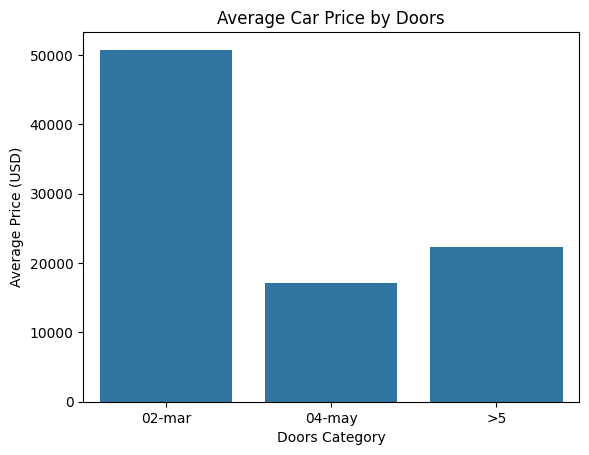

In [34]:
mean_prices = df_cleaned_6.groupby('doors')['price'].mean().reset_index()

sns.barplot(x='doors', y='price', data=mean_prices)
plt.title('Average Car Price by Doors')
plt.xlabel('Doors Category')
plt.ylabel('Average Price (USD)')
plt.show()


💡 **Observations**  
- Interpretation:  
  - **2-door cars** tend to be higher-end or sports vehicles, explaining the higher average price.  
  - **4-door cars** dominate the dataset and are more standard models, hence the lower average.  
  - **Vehicles with >5 doors** (e.g., vans) have a moderate price, but the sample size is small.  

> 🧠 This suggests `doors` is a **meaningful feature** for modeling, and the difference between 2-door cars and others may be important for predictive analysis.  
► Handling and encoding of this column will be addressed later during preprocessing in Notebook 02.*


### **7.** **Handle duplicates**  

In [35]:
#  Check for duplicates
print(f"Total rows of the datase now: {df_cleaned_6.shape[0]}")
duplicate_rows = df_cleaned_6.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Total rows of the datase now: 19208
Number of duplicate rows: 312


> *🧠 Check for near-duplicates by `id`*

In [36]:
# Drop 'id' column temporarily to check for duplicates
df_temp = df_cleaned_6.drop(columns=['id'])

# Check duplicates ignoring 'id'
num_duplicates = df_temp.duplicated().sum()
percentage_duplicates = (num_duplicates / df_cleaned_6.shape[0]) * 100

print(f"Number of duplicate rows (ignoring 'id'): {num_duplicates} ({percentage_duplicates:.2f}%)")


Number of duplicate rows (ignoring 'id'): 3511 (18.28%)


💡 **Observations:**  

- When ignoring the id column, there are 3,511 (~18%)duplicate rows in the dataset.

- These rows represent cars with identical values across all other columns.

- They should be removed to maintain data integrity before further cleaning and analysis.


In [37]:
# Drop duplicates in place
df_cleaned_6.drop_duplicates(subset=df_temp.columns, inplace=True)
print(f"Rows after removing duplicates: {df_cleaned_6.shape[0]}")

Rows after removing duplicates: 15697


## Finalize Cleaned Dataset

In [38]:
# Prints the name of each column in the dataset and its data type.
def df_info(df):
    table = PrettyTable()
    table.field_names = ["Column", "Dtype"]

    for col in df.columns:
        dtype = df[col].dtype
        table.add_row([col,dtype])

    print(table)

df_info(df_cleaned_6)

+------------------+---------+
|      Column      |  Dtype  |
+------------------+---------+
|        id        |  int64  |
|      price       |  int64  |
|       levy       | float64 |
|   manufacturer   |  object |
|      model       |  object |
|    prod_year     |  int64  |
|     category     |  object |
| leather_interior |  object |
|    fuel_type     |  object |
|  engine_volume   | float64 |
|     mileage      |  Int64  |
|    cylinders     |  Int64  |
|  gear_box_type   |  object |
|   drive_wheels   |  object |
|      doors       |  object |
|      wheel       |  object |
|      color       |  object |
|     airbags      |  Int64  |
|      turbo       |   bool  |
+------------------+---------+


In [39]:
# Take a quick look at the cleaned data set.
df_cleaned_6.head()

,id,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo
0,45654403,13328,1399.0,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005,6,automatic,4x4,04-may,left wheel,silver,12,False
1,44731507,16621,1018.0,chevrolet,equinox,2011,jeep,no,petrol,3.0,192000,6,tiptronic,4x4,04-may,left wheel,black,8,False
2,45774419,8467,0.0,honda,fit,2006,hatchback,no,petrol,1.3,200000,4,variator,front,04-may,right-hand drive,black,2,False
3,45769185,3607,862.0,ford,escape,2011,jeep,yes,hybrid,2.5,168966,4,automatic,4x4,04-may,left wheel,white,0,False
4,45809263,11726,446.0,honda,fit,2014,hatchback,yes,petrol,1.3,91901,4,automatic,front,04-may,left wheel,silver,4,False


💡 **Final observations from cleaned dataset:**  

- The dataset now has consistent formatting for categorical columns (all lowercase, trimmed).  
- Numeric columns such as `price`, `levy`, `mileage`, `engine_volume`, `cylinders`, and `airbags` are correctly typed (`Int64` or `float64`) and ready for analysis.  
- `leather_interior` is still in text form (`yes`/`no`) but will be mapped to binary in Notebook 02.  
- `doors` column still contains mis-parsed entries like `"04-may"`, which will be cleaned and encoded later in Notebook 02.  
- `turbo` boolean column is ready, extracted from `engine_volume` where applicable.  
- Some extreme values are present:  
  - Mileage `0` → possibly new cars  
  - High `price` values → likely premium or sports models  
- Overall, the dataset is clean enough for feature engineering, but a few columns require transformation before modeling (e.g., `doors`, `leather_interior`, `drive_wheels`).  

> 🧠 *Next step:* Let's move to **Notebook 02 — Feature Engineering & Preprocessing** for derive features, encode categoricals, and scale numeric variables for modeling.


## Save cleaned dataset

In [40]:

clean_data = df_cleaned_6.copy()

# Save cleaned dataset
clean_data.to_csv("data/processed/clean_data.csv", index=False)